# 상관분석, 회귀분석

url : http://rstudio-pubs-static.s3.amazonaws.com/189354_277dfb3a83a34a2abaae855b90fcf269.html

In [1]:
install.packages("UsingR")

Installing package into 'C:/Users/jang/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'UsingR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jang\AppData\Local\Temp\RtmpEfTnnv\downloaded_packages


In [2]:
require("UsingR")
data(galton)
str(galton)

Loading required package: UsingR
Loading required package: MASS
Loading required package: HistData
Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units


Attaching package: 'UsingR'

The following object is masked from 'package:survival':

    cancer



'data.frame':	928 obs. of  2 variables:
 $ child : num  61.7 61.7 61.7 61.7 61.7 62.2 62.2 62.2 62.2 62.2 ...
 $ parent: num  70.5 68.5 65.5 64.5 64 67.5 67.5 67.5 66.5 66.5 ...


다운 받은 galton 데이터는 부모와 아이의 키에 대한 928개의 자료이다. 우선 자료의 분포를 살표보기 위해 히스토그램으로 그려본다.

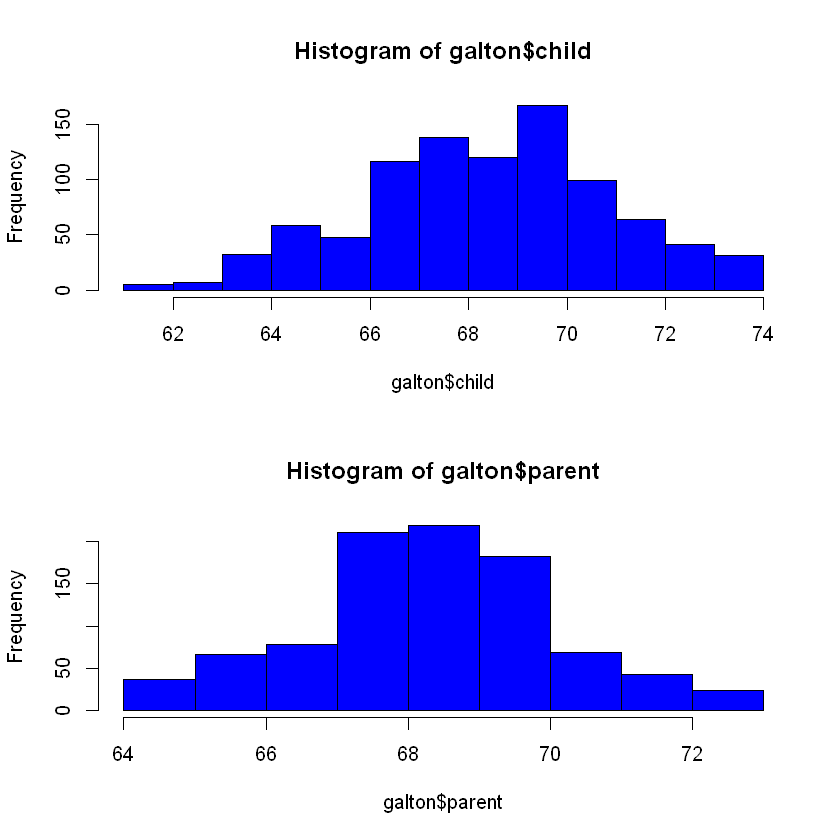

In [10]:
par(mfrow=c(2,1))
hist(galton$child, col="blue", breaks=10)
hist(galton$parent, col="blue", breaks=10)
par(mfrow=c(1,1))

부모와 아이의 자료의 상관관계를 구해본다.
- cor는 공분산을 구하는 기능

In [14]:
cor.test(galton$parent, galton$child)


	Pearson's product-moment correlation

data:  galton$parent and galton$child
t = 15.711, df = 926, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4064067 0.5081153
sample estimates:
      cor 
0.4587624 


분석결과 상관계수는 0.458이고 p값은 <2.2e-16($2.2\times10^{16}$)으로 매우 유의한 상관관계가 있다.부모와 아이의 키를 표로 요약해본다.

In [15]:
xtabs(~child+parent, data=galton)

      parent
child  64 64.5 65.5 66.5 67.5 68.5 69.5 70.5 71.5 72.5 73
  61.7  1    1    1    0    0    1    0    1    0    0  0
  62.2  0    1    0    3    3    0    0    0    0    0  0
  63.2  2    4    9    3    5    7    1    1    0    0  0
  64.2  4    4    5    5   14   11   16    0    0    0  0
  65.2  1    1    7    2   15   16    4    1    1    0  0
  66.2  2    5   11   17   36   25   17    1    3    0  0
  67.2  2    5   11   17   38   31   27    3    4    0  0
  68.2  1    0    7   14   28   34   20   12    3    1  0
  69.2  1    2    7   13   38   48   33   18    5    2  0
  70.2  0    0    5    4   19   21   25   14   10    1  0
  71.2  0    0    2    0   11   18   20    7    4    2  0
  72.2  0    0    1    0    4    4   11    4    9    7  1
  73.2  0    0    0    0    0    3    4    3    2    2  3
  73.7  0    0    0    0    0    0    5    3    2    4  0

결과표를 통해 직선관계가 있음을 알 수 있다. 이런 관계를 수학적으로 나타내기 위해 회귀분석을 사용한다.
- R에서 선형모형 **[lm Linear Model]**을 사용
- lm(종속변수~독립변수, 데이터)

In [16]:
out = lm(child~parent, data=galton)
summary(out)


Call:
lm(formula = child ~ parent, data = galton)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8050 -1.3661  0.0487  1.6339  5.9264 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.94153    2.81088   8.517   <2e-16 ***
parent       0.64629    0.04114  15.711   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.239 on 926 degrees of freedom
Multiple R-squared:  0.2105,	Adjusted R-squared:  0.2096 
F-statistic: 246.8 on 1 and 926 DF,  p-value: < 2.2e-16


결과를 보면 **[Intercept y절편]**이 23.94, parent의 기울기는 0.65이다.
- $ y = 0.65x + 23.94 $

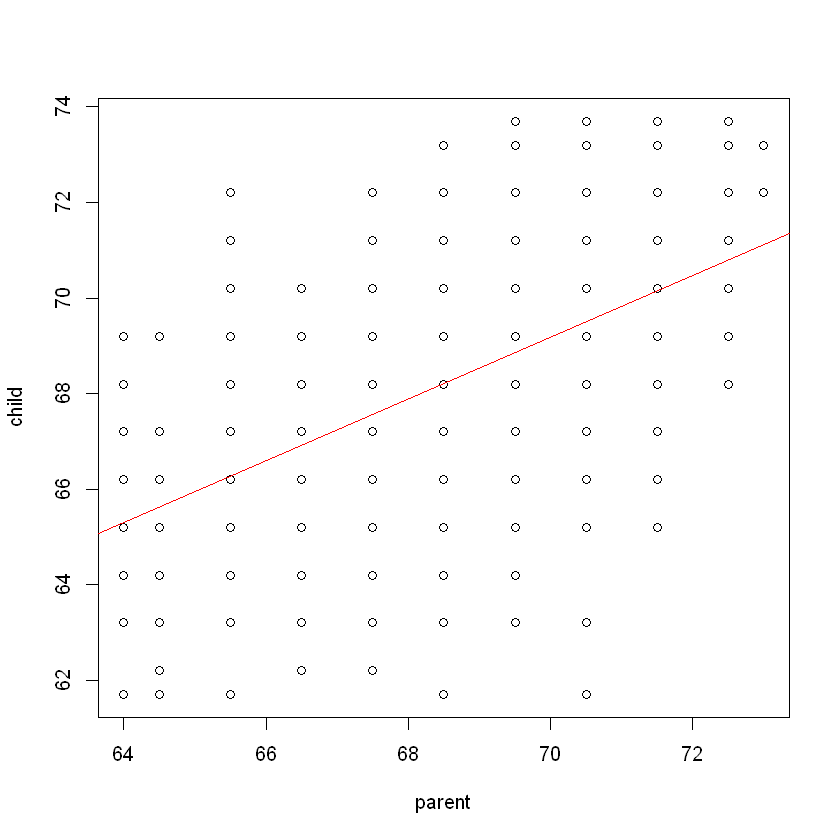

In [18]:
plot(child~parent, data=galton)
abline(out, col="red")

그래프를 그렸지만 개선할 부분이 있다. ggplot2 패키지의 geom_count()를 이용해 다시 그려보자.

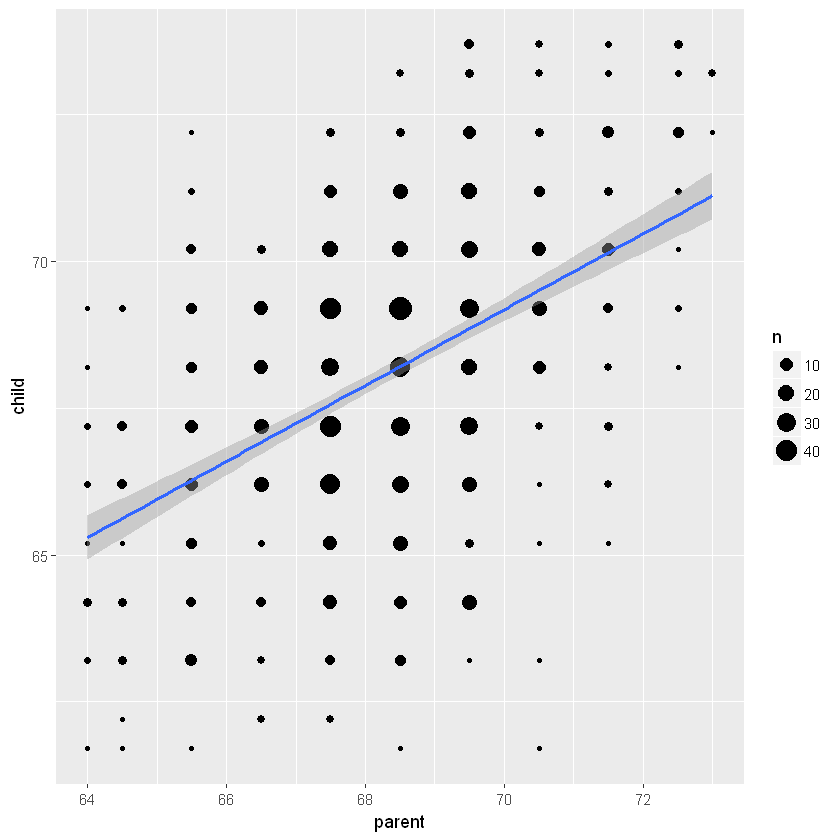

In [24]:
require(ggplot2)
ggplot(data=galton, aes(x=parent, y=child))+geom_count()+geom_smooth(method="lm")